# **Reading the data**

Reading the raw data, these data have already been transformed into a csv file and the columns `DTTRAT`, `DTULTINFO` and `DTRECIDIVA` had the values #NULL! replaced by NaN. 

In [ ]:
data = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/BD_Lucas.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (33,34,78,83,88,89,90) have mixed types.Specify dtype option on import or set low_memory=False.



(922473, 93)


,SEXO,IDADE,ESCOLARI,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,HABILIT2
0,1,41,2,SP,SP,3509502,CAMPINAS,9,2005-01-14,30,1,2005-06-30,3,C179,C17,INTESTINO DELGADO SOE,82611,ADENOMA VILOSO SOE,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2005-08-03 00:00:00,8,F,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-08-10 00:00:00,2.0,167,201.0,34.0,2005,NaN,NaN,NaN,40-49,8,NaN,DRS 07 CAMPINAS,15,2006-12-14,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,1
1,2,0,2,SP,AM,1302603,MANAUS,2,2012-05-23,25,2,2005-09-17,3,C411,C41,MANDIBULA,88231,FIBROMA DESMOPLASICO,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2012-05-23 00:00:00,8,E,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2012-05-30 00:00:00,1.0,2440,0.0,2440.0,2005,NaN,NaN,NaN,00-09,8,NaN,NaN,99,2015-01-08,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,2
2,1,56,9,SP,SP,3508702,CACONDE,9,2003-08-25,12,1,2003-08-26,3,C186,C18,COLON DESCENDENTE,82611,ADENOMA VILOSO SOE,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2003-10-15 00:00:00,8,A,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2003-11-26 00:00:00,3.0,1,51.0,50.0,2003,NaN,NaN,NaN,50-59,8,NaN,DRS 14 SÃO JOÃO DA BOA VISTA,15,2004-08-25,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,2
3,1,26,2,MG,SP,3529401,MAUA,9,2003-02-04,4,1,2003-05-29,3,C491,C49,TEC CONJUNTIVOSUBCUTANEO E OUTROS TECIDOS MOLE...,88231,FIBROMA DESMOPLASICO,IIA,II,2B,0,0,NaN,NaN,NaN,8,1,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2003-05-29 00:00:00,8,I,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-02-12 00:00:00,2.0,114,114.0,0.0,2003,NaN,NaN,NaN,20-29,8,NaN,DRS 01 SÃO PAULO,1,2003-12-01,1.0,2011-02-03 00:00:00,0,1,0,0,C49,NaN,NaN,NaN,2
4,2,40,3,BA,SP,3550308,SAO PAULO,9,2000-08-29,3,2,2000-08-29,3,C410,C41,OSSOS DO CRANIO E DA FACE E RESPECTIVAS ARTICU...,88231,FIBROMA DESMOPLASICO,Y,Y,Y,Y,Y,Y,Y,Y,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2001-02-12 00:00:00,8,I,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2002-04-24 00:00:00,3.0,0,167.0,167.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 01 SÃO PAULO,6,2001-05-24,1.0,2001-09-15 00:00:00,1,0,0,0,NaN,NaN,NaN,NaN,1


In [ ]:
# #NULL! to NaN
# data.loc[data.DTRECIDIVA == '#NULL!', 'DTRECIDIVA'] = np.nan
# data.loc[data.DTTRAT == '#NULL!', 'DTTRAT'] = np.nan
# data.loc[data.DTULTINFO == '#NULL!', 'DTULTINFO'] = np.nan

In [ ]:
# save_csv(data, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/BD_Lucas.csv')

# **Data analysis**

In this section we will analyze some data information with graphs, missing values and each column of the dataset individually.

## **Information**

To start we have the most basic information of the data, such as the size of the dataset, the first lines, type of each column and the describe function that brings some statistical information for each column.

In [ ]:
data.shape

(922473, 93)

In [ ]:
data.head()

,SEXO,IDADE,ESCOLARI,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,HABILIT2
0,1,41,2,SP,SP,3509502,CAMPINAS,9,2005-01-14,30,1,2005-06-30,3,C179,C17,INTESTINO DELGADO SOE,82611,ADENOMA VILOSO SOE,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2005-08-03 00:00:00,8,F,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-08-10 00:00:00,2.0,167,201.0,34.0,2005,NaN,NaN,NaN,40-49,8,NaN,DRS 07 CAMPINAS,15,2006-12-14,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,1
1,2,0,2,SP,AM,1302603,MANAUS,2,2012-05-23,25,2,2005-09-17,3,C411,C41,MANDIBULA,88231,FIBROMA DESMOPLASICO,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2012-05-23 00:00:00,8,E,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2012-05-30 00:00:00,1.0,2440,0.0,2440.0,2005,NaN,NaN,NaN,00-09,8,NaN,NaN,99,2015-01-08,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,2
2,1,56,9,SP,SP,3508702,CACONDE,9,2003-08-25,12,1,2003-08-26,3,C186,C18,COLON DESCENDENTE,82611,ADENOMA VILOSO SOE,Y,Y,Y,Y,Y,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2003-10-15 00:00:00,8,A,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2003-11-26 00:00:00,3.0,1,51.0,50.0,2003,NaN,NaN,NaN,50-59,8,NaN,DRS 14 SÃO JOÃO DA BOA VISTA,15,2004-08-25,1.0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,2
3,1,26,2,MG,SP,3529401,MAUA,9,2003-02-04,4,1,2003-05-29,3,C491,C49,TEC CONJUNTIVOSUBCUTANEO E OUTROS TECIDOS MOLE...,88231,FIBROMA DESMOPLASICO,IIA,II,2B,0,0,NaN,NaN,NaN,8,1,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2003-05-29 00:00:00,8,I,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2019-02-12 00:00:00,2.0,114,114.0,0.0,2003,NaN,NaN,NaN,20-29,8,NaN,DRS 01 SÃO PAULO,1,2003-12-01,1.0,2011-02-03 00:00:00,0,1,0,0,C49,NaN,NaN,NaN,2
4,2,40,3,BA,SP,3550308,SAO PAULO,9,2000-08-29,3,2,2000-08-29,3,C410,C41,OSSOS DO CRANIO E DA FACE E RESPECTIVAS ARTICU...,88231,FIBROMA DESMOPLASICO,Y,Y,Y,Y,Y,Y,Y,Y,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2001-02-12 00:00:00,8,I,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2002-04-24 00:00:00,3.0,0,167.0,167.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 01 SÃO PAULO,6,2001-05-24,1.0,2001-09-15 00:00:00,1,0,0,0,NaN,NaN,NaN,NaN,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922473 entries, 0 to 922472
Data columns (total 93 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEXO        922473 non-null  int64  
 1   IDADE       922473 non-null  int64  
 2   ESCOLARI    922473 non-null  int64  
 3   UFNASC      922473 non-null  object 
 4   UFRESID     922473 non-null  object 
 5   IBGE        922473 non-null  int64  
 6   CIDADE      922473 non-null  object 
 7   CATEATEND   922473 non-null  int64  
 8   DTCONSULT   922473 non-null  object 
 9   CLINICA     922473 non-null  int64  
 10  DIAGPREV    922473 non-null  int64  
 11  DTDIAG      922473 non-null  object 
 12  BASEDIAG    922473 non-null  int64  
 13  TOPO        922473 non-null  object 
 14  TOPOGRUP    922473 non-null  object 
 15  DESCTOPO    922473 non-null  object 
 16  MORFO       922473 non-null  int64  
 17  DESCMORFO   922469 non-null  object 
 18  EC          922473 non-null  object 
 19  EC

In [ ]:
data.describe()

,SEXO,IDADE,ESCOLARI,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,MORFO,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META03,META04,NAOTRAT,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,LATERALI,RRAS,REGISTRADO,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC04,HABILIT2
count,922473.000000,922473.000000,922473.000000,9.224730e+05,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.0,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,4.440000e+02,0.0,0.0,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.0,922473.0,922473.0,922473.0,922473.0,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922473.000000,922470.000000,922473.000000,848682.000000,848682.000000,922473.000000,0.0,0.0,0.0,922473.000000,922473.000000,920925.000000,922473.000000,922473.000000,922473.000000,922473.000000,0.0,922473.000000
mean,1.501193,59.773823,4.318006,3.543215e+06,4.790818,21.530410,1.380487,2.987335,83644.849173,8.0,7.853138,7.978581,7.996965,7.789755,7.797894,5.183580e+07,NaN,NaN,7.791193,0.083701,0.617216,0.264324,0.358157,0.124532,0.003842,0.006696,0.061035,0.999318,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.953824,0.004385,0.029604,0.007096,0.002158,0.000222,0.000149,0.006587,2.453364,53.022836,69.518061,67.831754,2010.591575,NaN,NaN,NaN,6.870138,15.829553,11.271003,0.913001,0.042336,0.024433,0.025516,NaN,1.635959
std,0.499999,16.907895,2.939945,3.465128e+05,3.519881,12.624555,0.485507,0.226864,4607.811838,0.0,0.947325,0.375104,0.141827,1.160094,1.109859,1.091127e+09,NaN,NaN,0.909882,0.276939,0.486067,0.440973,0.479459,0.330187,0.061863,0.081556,0.239394,0.026104,0.001041,0.001041,0.0,0.0,0.0,0.0,0.0,0.209866,0.066074,0.169493,0.083939,0.046408,0.014906,0.012186,0.080890,0.860908,165.460615,147.149209,151.181450,5.384567,NaN,NaN,NaN,2.470771,23.514225,11.528516,0.281833,0.201355,0.154390,0.157687,NaN,0.481160
min,1.000000,0.000000,1.000000,1.100015e+06,1.000000,1.000000,1.000000,1.000000,80001.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2000.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,1.000000,51.000000,2.000000,3.517406e+06,2.000000,12.000000,1.000000,3.000000,80703.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000e+00,NaN,NaN,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,13.000000,0.000000,2006.000000,NaN,NaN,NaN,8.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000
50%,2.000000,62.000000,3.000000,3.539301e+06,2.000000,24.000000,1.000000,3.000000,81403.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000e+00,NaN,NaN,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,40.000000,34.000000,2011.000000,NaN,NaN,NaN,8.000000,10.000000,7.000000,1.000000,0.000000,0.000000,0.000000,NaN,2.000000
75%,2.000000,72.000000,9.000000,3.550308e+06,9.000000,29.000000,2.000000,3.000000,85003.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,2.000000e+00,NaN,NaN,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000

The first graph shows the number of patients per year of diagnosis, a low number of patients is perceived in recent years, probably due to the fact that these cases are still being followed up.

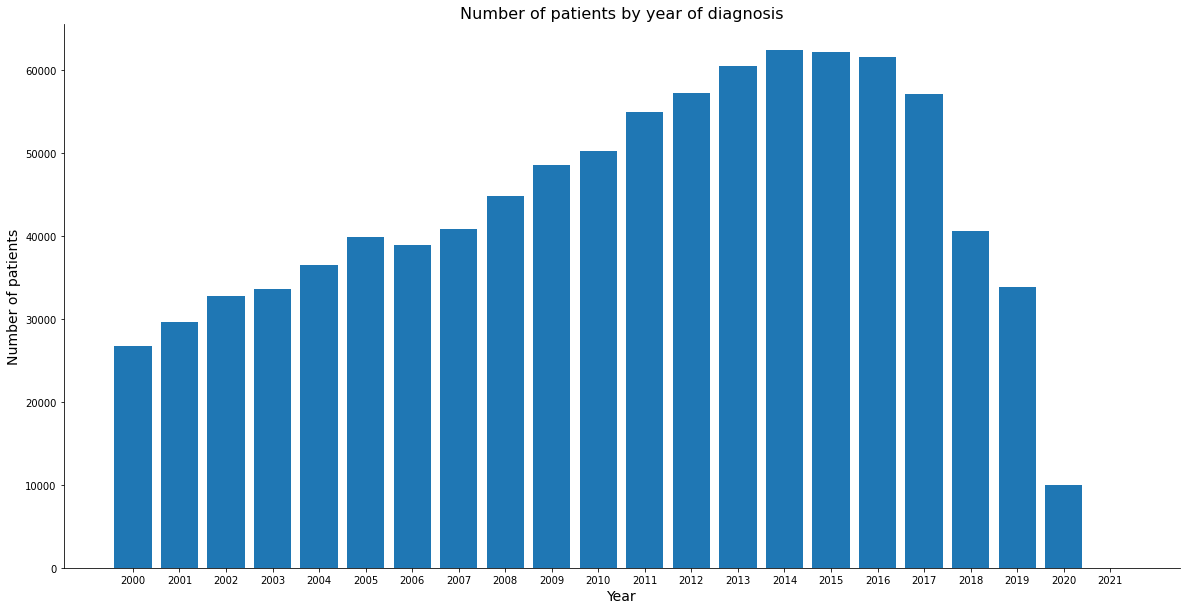

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(height = data.ANODIAG.value_counts().sort_index(), x=np.sort(data.ANODIAG.unique()))
plt.xlabel('Year', size=14)
plt.xticks(np.sort(data.ANODIAG.unique()))
plt.ylabel('Number of patients', size=14)
plt.title('Number of patients by year of diagnosis', size=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In the following graph we have the number of patients by sex, it's possible to notice that in each year the values are close for men and women.

In [ ]:
masc = data[data.SEXO == 1]
fem = data[data.SEXO == 2]

mascx = np.sort(masc.ANODIAG.unique())
mascy = masc.ANODIAG.value_counts().sort_index()

femx = np.sort(fem.ANODIAG.unique())
femy = fem.ANODIAG.value_counts().sort_index()

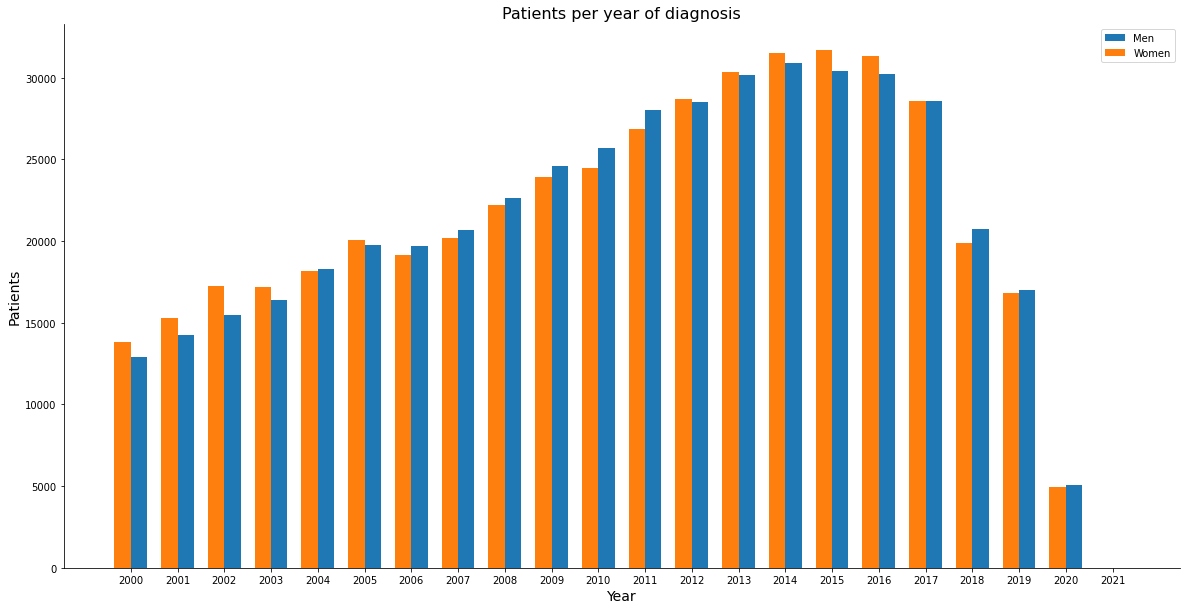

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.35
ax1 = ax.bar(mascx + width/2, mascy, width, label='Men')
ax2 = ax.bar(femx - width/2, femy, width, label='Women')
ax.set_xlabel('Year', size=14)
ax.set_xticks(mascx)
ax.set_ylabel('Patients', size=14)
ax.set_title('Patients per year of diagnosis', size=16)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Analyzing the percentage of patients by age, we can see that women present the disease earlier, we have 23% of women from 30 to 49 years old against 11% of men in the same age group, but after 60 years old the number of men is higher in relation to women. It is also noticed that there is a higher incidence of cancer after 40 years old, with more than 85% of cases in both genders being in this age group.

In [ ]:
# Using the replace to change the string format for the age group column
masc.FAIXAETAR = masc.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                        ['00 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69'])
fem.FAIXAETAR = fem.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                      ['00 to 09', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69'])

In [ ]:
mascx = np.sort(masc.FAIXAETAR.unique())
mascy = masc.FAIXAETAR.value_counts().sort_index()

femx = np.sort(fem.FAIXAETAR.unique())
femy = fem.FAIXAETAR.value_counts().sort_index()

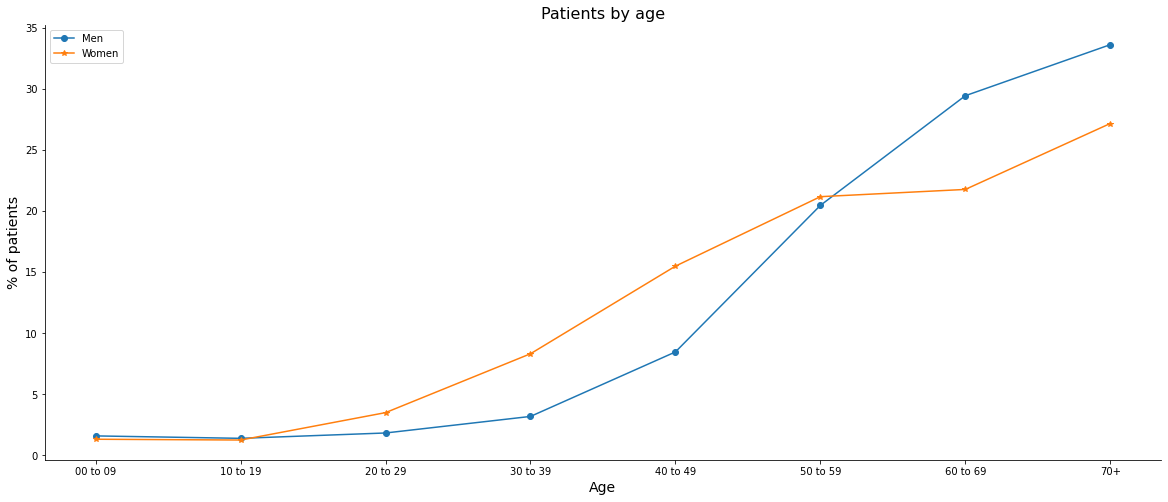

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(mascx, (mascy/masc.shape[0])*100, label='Men', marker='o')
ax2 = ax.plot(femx, (femy/fem.shape[0])*100, label='Women', marker='*')
ax.set_xlabel('Age', size=14)
ax.set_ylabel('% of patients', size=14)
ax.set_title('Patients by age', size=16)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Looking at the clinical stage by sex, lower values for staging represent less aggressive diseases, we see women with more cases for stages 0, 1 and 3 and men with higher numbers in stage 2 and much higher in stage 4.

The clinical stage assists the doctors in the therapeutic planning and in the evaluation of the proposed treatment, in addition to serving for the prediction of the prognosis.

In the analysis of the data according to staging, cases reported as X (cases which it is not possible to perform staging or without information) and Y (type of cancer which the classification of malignant TNM tumors are not applied) were excluded.

In [ ]:
EC = list(np.sort(data.ECGRUP.unique()))[:5] # Categories 0, I, II, III, IV, without X and Y

mascEC = masc.loc[masc.ECGRUP.isin(EC)]
femEC = fem.loc[fem.ECGRUP.isin(EC)]

mascx = np.sort(mascEC.ECGRUP.unique())
mascy = mascEC.ECGRUP.value_counts().sort_index()

femx = np.sort(femEC.ECGRUP.unique())
femy = femEC.ECGRUP.value_counts().sort_index()

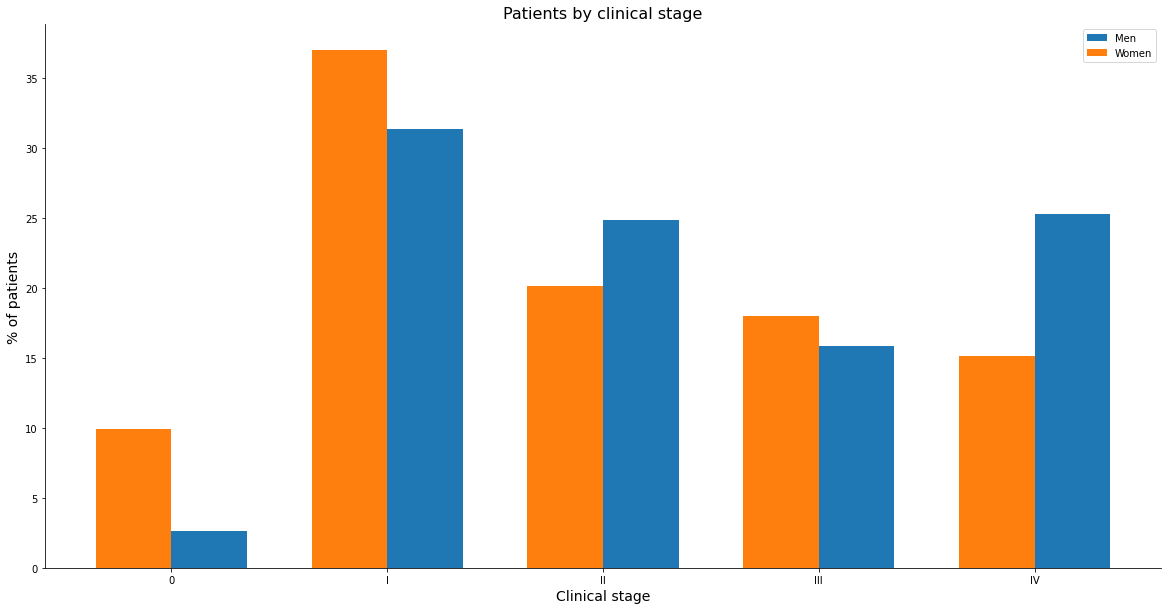

In [ ]:
x = np.arange(len(mascx))
fig, ax = plt.subplots(figsize=(20,10))
width = 0.35
ax1 = ax.bar(x + width/2, (mascy/mascEC.shape[0])*100, width, label='Men')
ax2 = ax.bar(x - width/2, (femy/femEC.shape[0])*100, width, label='Women')
ax.set_xlabel('Clinical stage', size=14)
ax.set_ylabel('% of patients', size=14)
ax.set_title('Patients by clinical stage', size=16)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(mascx))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

To analyze the time between consultation and diagnosis, the median number of days for each year was used, looking only at patients without diagnosis and without treatment in this first graph. For 2020 and 2021 we have less data, so the median is not realiable.

In [ ]:
df_diag1 = data[data.DIAGPREV == 1] # without diagnosis/without treatment
df_diag2 = data[data.DIAGPREV == 2] # with diagnosis/without treatment

In [ ]:
x = np.sort(df_diag1.ANODIAG.unique())
y = df_diag1.groupby('ANODIAG')['CONSDIAG'].median()

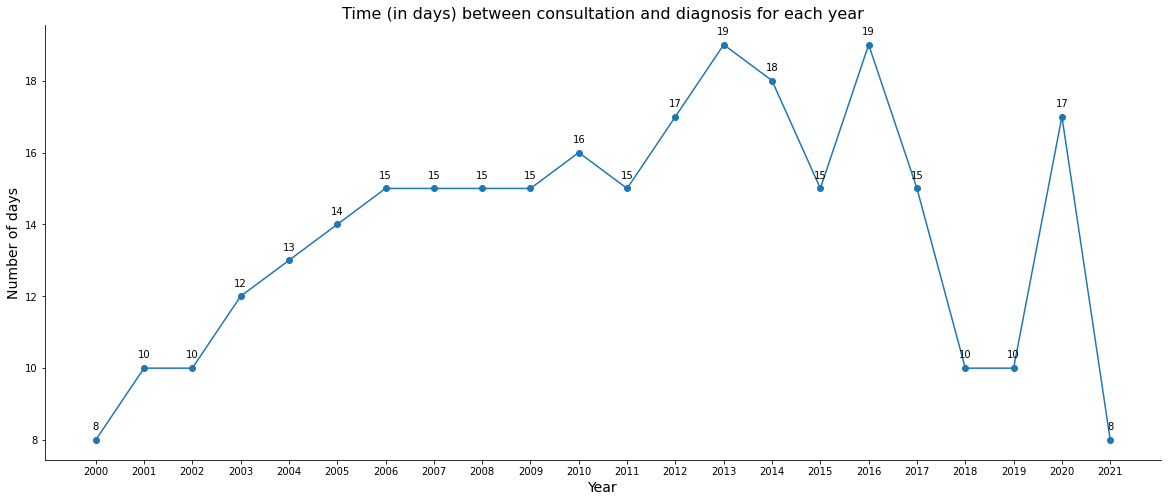

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x, y, marker='o')
plt.xlabel('Year', size=14)
plt.xticks(x)
plt.ylabel('Number of days', size=14)
plt.title('Time (in days) between consultation and diagnosis for each year', size=16)
for xi, yi in zip(x,y):
    label = '{:.0f}'.format(yi)
    plt.annotate(label, # this is the text
                 (xi, yi), # this is the point to label
                 textcoords='offset points', # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Now comparing patients without previous diagnosis with those who had the diagnosis, we can a much higher number of days to start treatment for people who already had the diagnosis of the disease, probably because they may have sought after other medical opinions, having gone to more than one hospital, delaying the start of cancer treatment.

In this analysis, C44 topographies (with morphologies between 80101 and 81103), who did not undergo any treatment (NAOTRAT = 8) and morphology 80001 (neoplasms with uncertain behavior) were excluded.

In [ ]:
df1 = df_diag1[(df_diag1.TOPOGRUP == 'C44') & (df_diag1.MORFO > 80101) & (df_diag1.MORFO < 81103)]
df2 = df_diag2[(df_diag2.TOPOGRUP == 'C44') & (df_diag2.MORFO > 80101) & (df_diag2.MORFO < 81103)]

id1 = df1.index
df_diag1 = df_diag1.drop(id1)

id2 = df2.index
df_diag2 = df_diag2.drop(id2)

df_diag1 = df_diag1[(df_diag1.NAOTRAT == 8) & (df_diag1.MORFO != 80001)] 
df_diag2 = df_diag2[(df_diag2.NAOTRAT == 8) & (df_diag2.MORFO != 80001)]

x1 = np.sort(df_diag1.ANODIAG.unique())
y1 = df_diag1.groupby('ANODIAG')['DIAGTRAT'].median()

x2 = np.sort(df_diag2.ANODIAG.unique())
y2 = df_diag2.groupby('ANODIAG')['DIAGTRAT'].median()

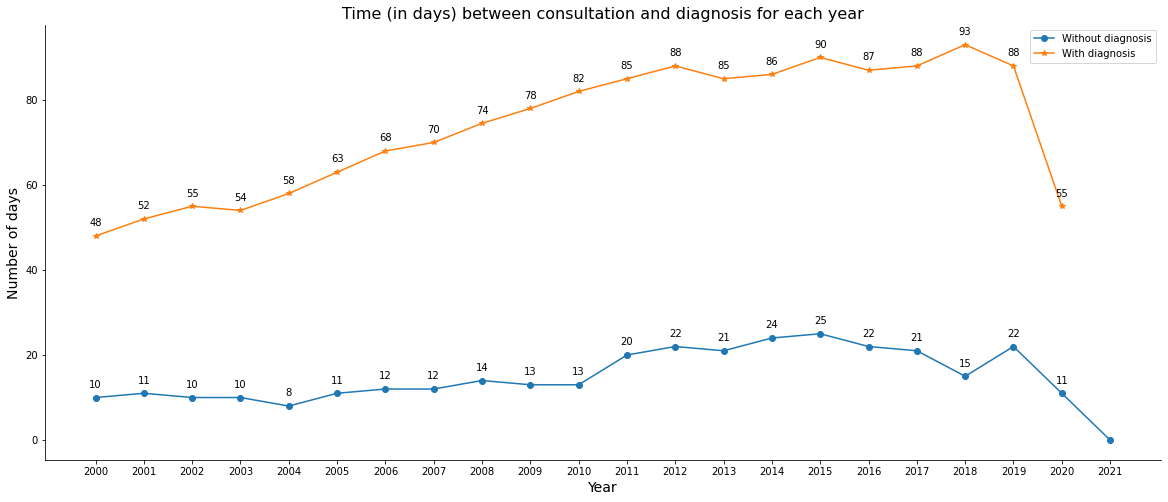

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax1 = ax.plot(x1, y1, label='Without diagnosis', marker='o')
ax2 = ax.plot(x2, y2, label='With diagnosis', marker='*')
ax.set_xlabel('Year', size=14)
ax.set_xticks(x1)
ax.set_ylabel('Number of days', size=14)
ax.set_title('Time (in days) between consultation and diagnosis for each year', size=16)
ax.legend()
for xi1, yi1, xi2, yi2 in zip(x1, y1, x2, y2):
    label1 = '{:.0f}'.format(yi1)
    label2 = '{:.0f}'.format(yi2)
    ax.annotate(label1, # this is the text
                (xi1, yi1), # this is the point to label
                textcoords='offset points', # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
    ax.annotate(label2, # this is the text
                (xi2, yi2), # this is the point to label
                textcoords='offset points', # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Now looking at the data from the latest patient information, we have a higher number of women in the category alive and of men in the two categories related to patient death, by cancer and other causes.

In [ ]:
# 1 – Alive with cancer; 2 – Alive, without other specifications;
# 3 – Death by cancer; 4 – Death by other causes, without other specifications
data['ULTINFO'].value_counts()

2.0    419178
3.0    275748
4.0    123337
1.0    104207
Name: ULTINFO, dtype: int64

In [ ]:
mascx = np.sort(masc.ULTINFO.unique())
mascy = masc.ULTINFO.value_counts().sort_index()

femx = np.sort(fem.ULTINFO.unique())
femy = fem.ULTINFO.value_counts().sort_index()

x_ticks = ['Alive with cancer', 'Alive, without other specifications', 'Death by cancer', 'Death by other causes']

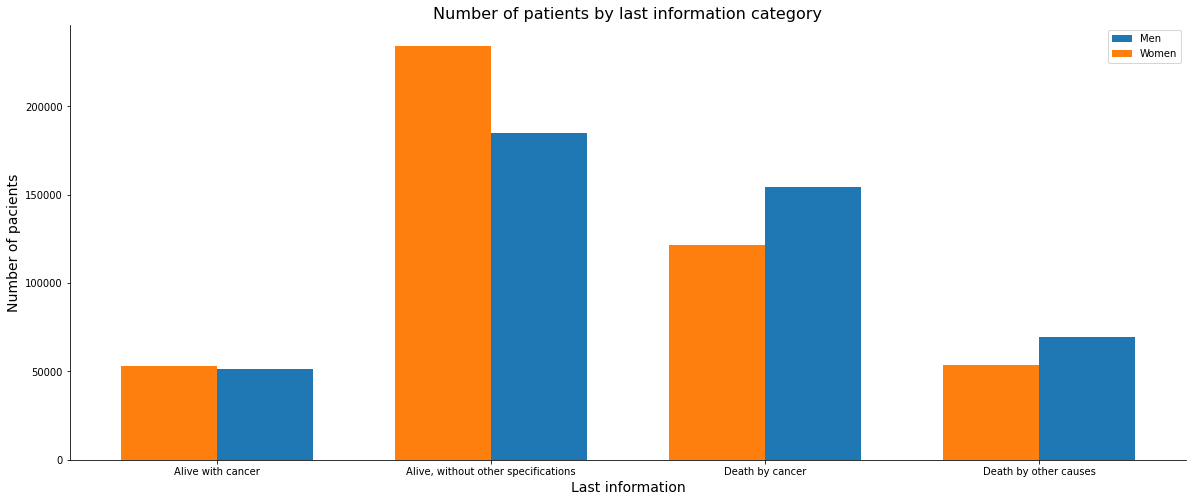

In [ ]:
x = np.arange(len(x_ticks))
fig, ax = plt.subplots(figsize=(20, 8))
width = 0.35
ax1 = ax.bar(x + width/2, mascy, width, label='Men')
ax2 = ax.bar(x - width/2, femy, width, label='Women')
ax.set_xlabel('Last information', size=14)
ax.set_ylabel('Number of pacients', size=14)
ax.set_title('Number of patients by last information category', size=16)

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(list(x_ticks))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Now we will analyze the correlation of the `ULTINFO` column with the others in this dataset, we notice a good correlation with `ANODIAG`, which has the year of the patient's diagnosis, and with `CATEATEND`, which indicates the category of patient care at the hospital, otherwise we don't have such high correlations. 


In [ ]:
df_aux = data.copy()
df_aux.drop(columns=['S','META03','META04','QUIMIOANT','HORMOANT','TMOANT','IMUNOANT',
                     'OUTROANT','CICI','CICIGRUP','CICISUBGRU','REC04'], inplace=True)
corr_matrix = df_aux.corr()
abs(corr_matrix['ULTINFO']).sort_values(ascending = False)

ULTINFO       1.000000
ANODIAG       0.273169
CATEATEND     0.205837
IDADE         0.179007
CIRURGIA      0.128572
NAOTRAT       0.128528
GLEASON       0.118442
PSA           0.117614
NENHUM        0.112360
SEXO          0.085168
NENHUMAPOS    0.084783
ESCOLARI      0.077620
LATERALI      0.071756
RECREGIO      0.067356
RECNENHUM     0.066257
HORMONIO      0.065746
DIAGTRAT      0.059665
MORFO         0.059482
CLINICA       0.058677
OUTROAPOS     0.054789
QUIMIOAPOS    0.053917
QUIMIO        0.050139
CONSDIAG      0.050010
DIAGPREV      0.048716
RADIOAPOS     0.046268
HABILIT2      0.044645
REGISTRADO    0.036998
RADIO         0.036454
RECLOCAL      0.031626
HORMOAPOS     0.030271
OUTRACLA      0.029044
CIRURAPOS     0.024829
TRATCONS      0.023725
RRAS          0.022394
RECDIST       0.022101
LOCALTNM      0.020620
OUTROS        0.019981
BASEDIAG      0.017092
G             0.012019
IDMITOTIC     0.011892
IBGE          0.009061
NENHUMANT     0.008739
IMUNOAPOS     0.007141
IMUNO      

In the correlation matrix we can see the correlations between all columns and as described above for the case of the analysis only for `ULTINFO`, we do not have very high correlations. 

It is important to note that the data has not been processed yet, so after preprocessing a more explanatory matrix for the data can be obtained.

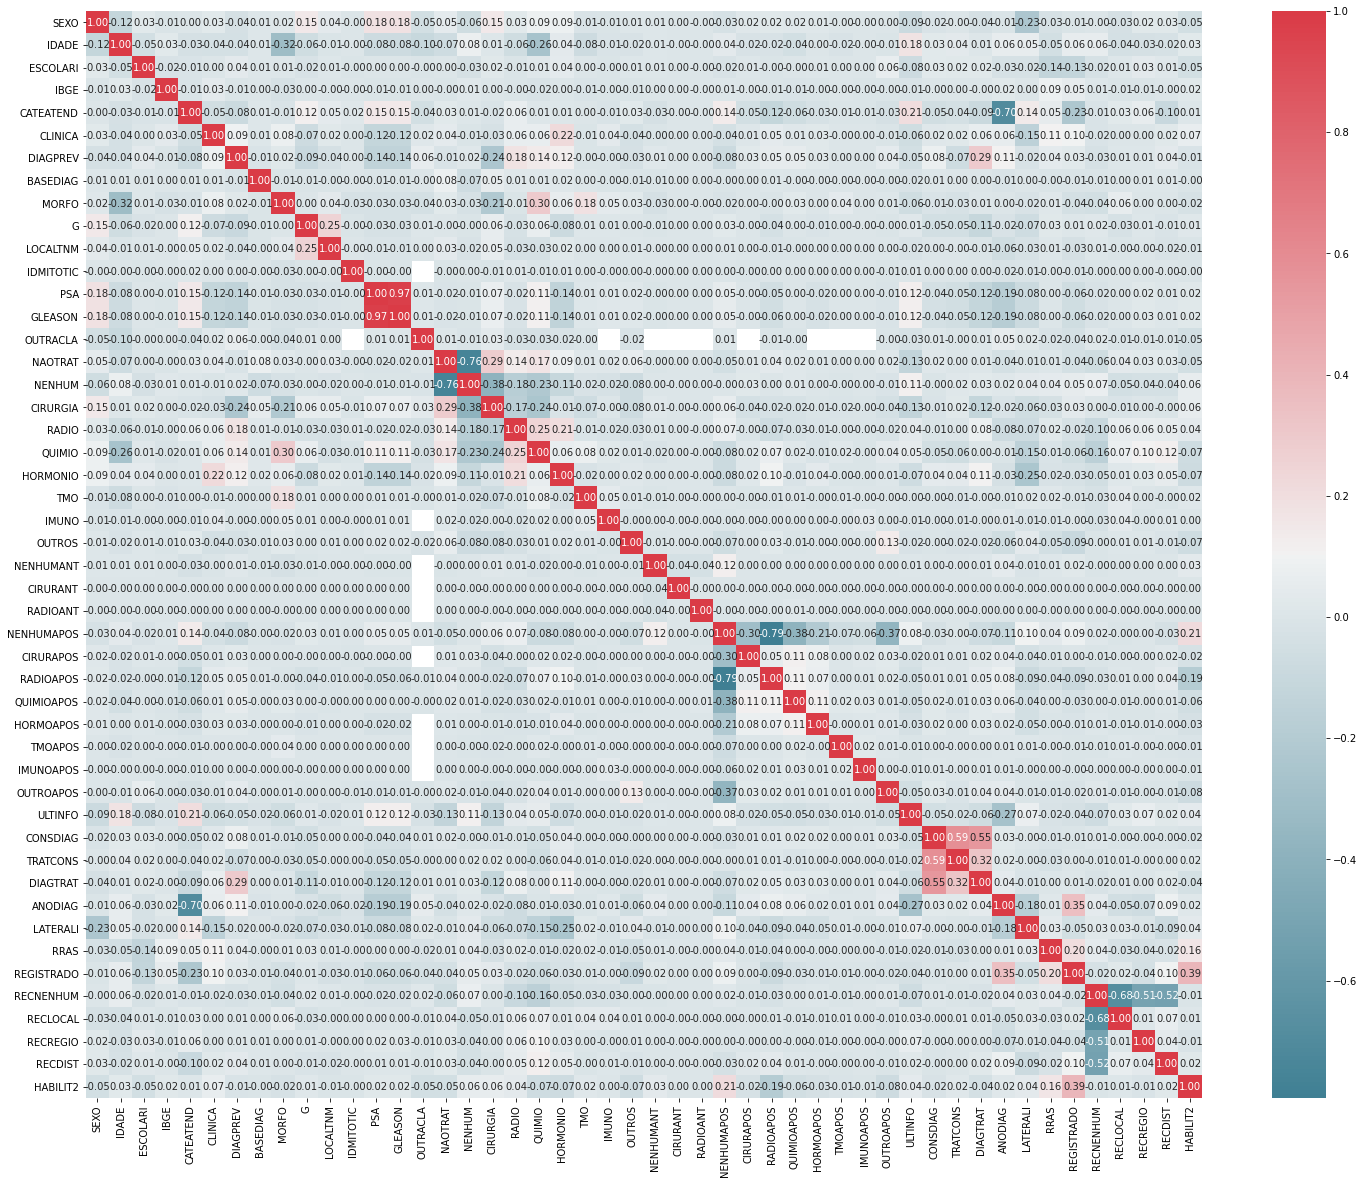

In [ ]:
fig, ax = plt.subplots(figsize = (25,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(corr_matrix, cmap = colormap, annot = True, fmt = '.2f')
fig.show()

With the histograms you can see how the distributions of the dataset columns are, but since we have most of them with categorical data, the histograms bring information about the amount of data in the respective categories.

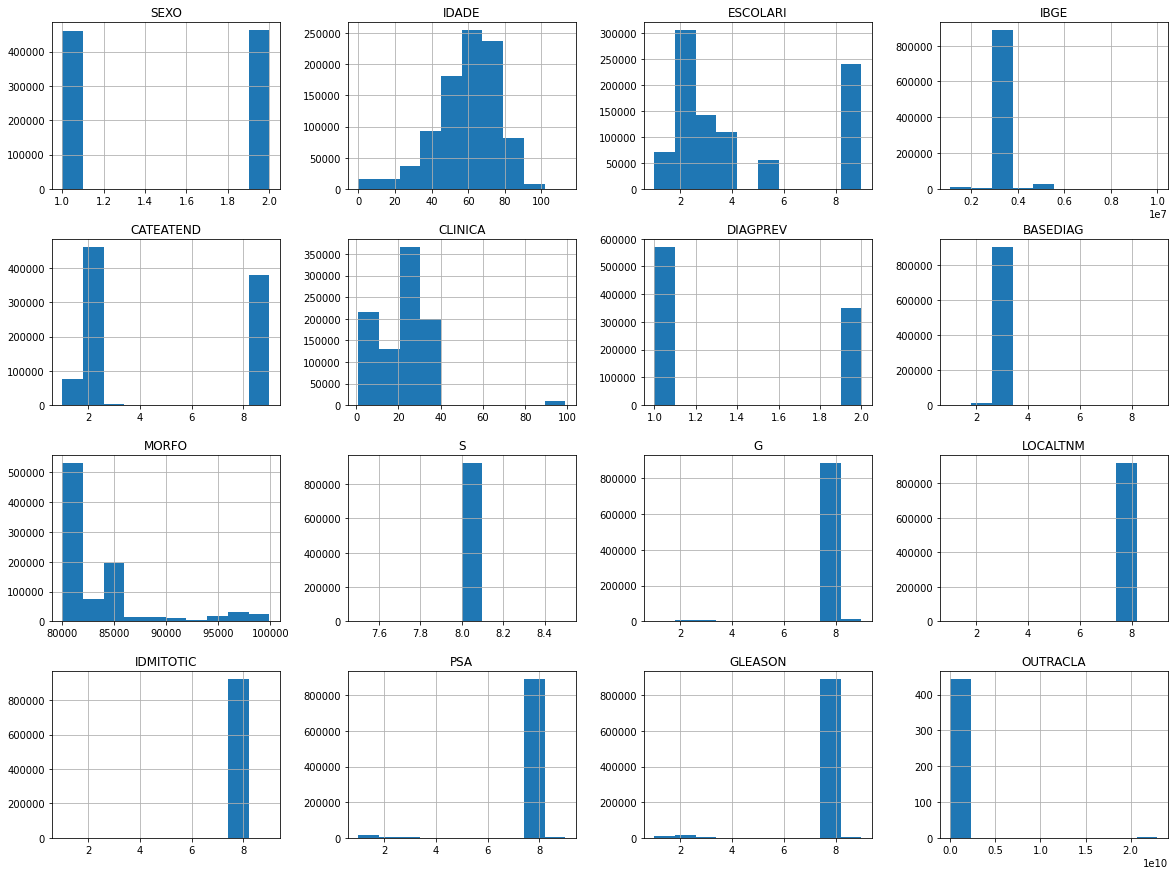

In [ ]:
data.iloc[:,:35].hist(bins=10,figsize=(20,15))
plt.show()

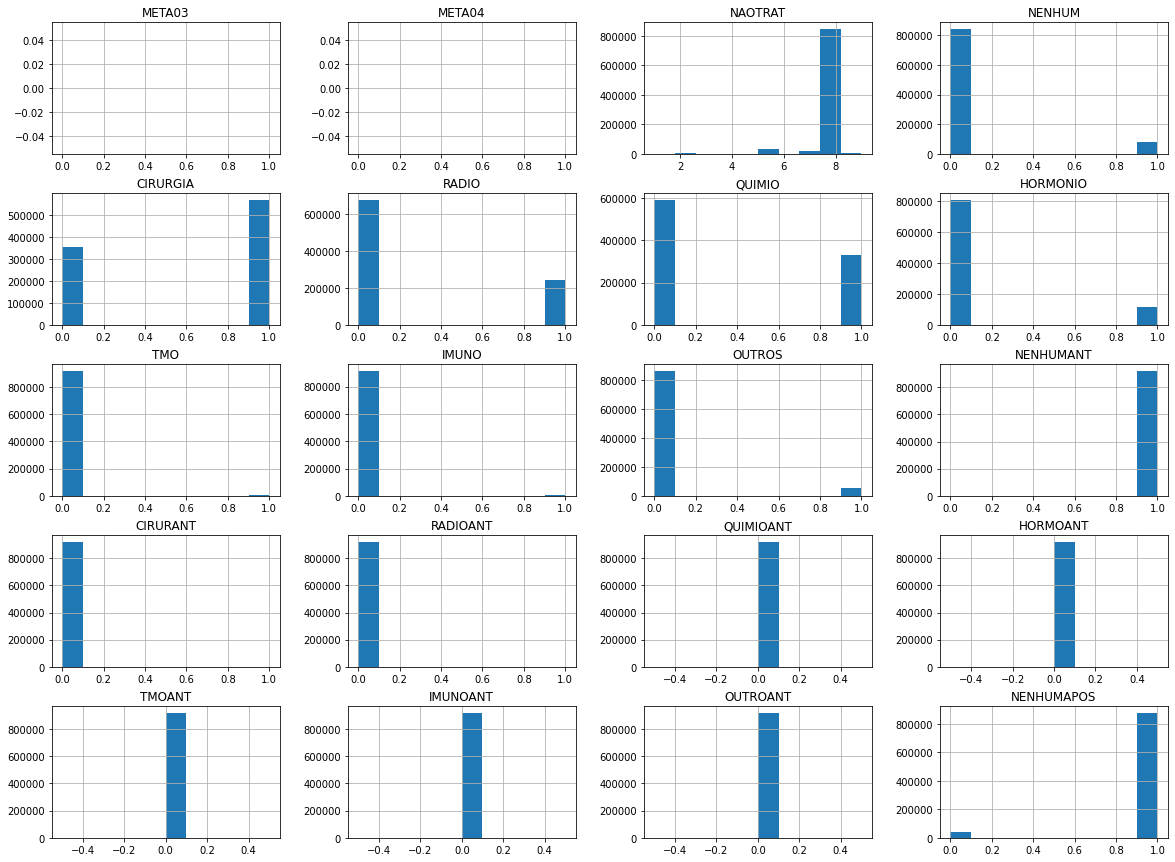

In [ ]:
data.iloc[:,35:60].hist(bins=10,figsize=(20,15))
plt.show()

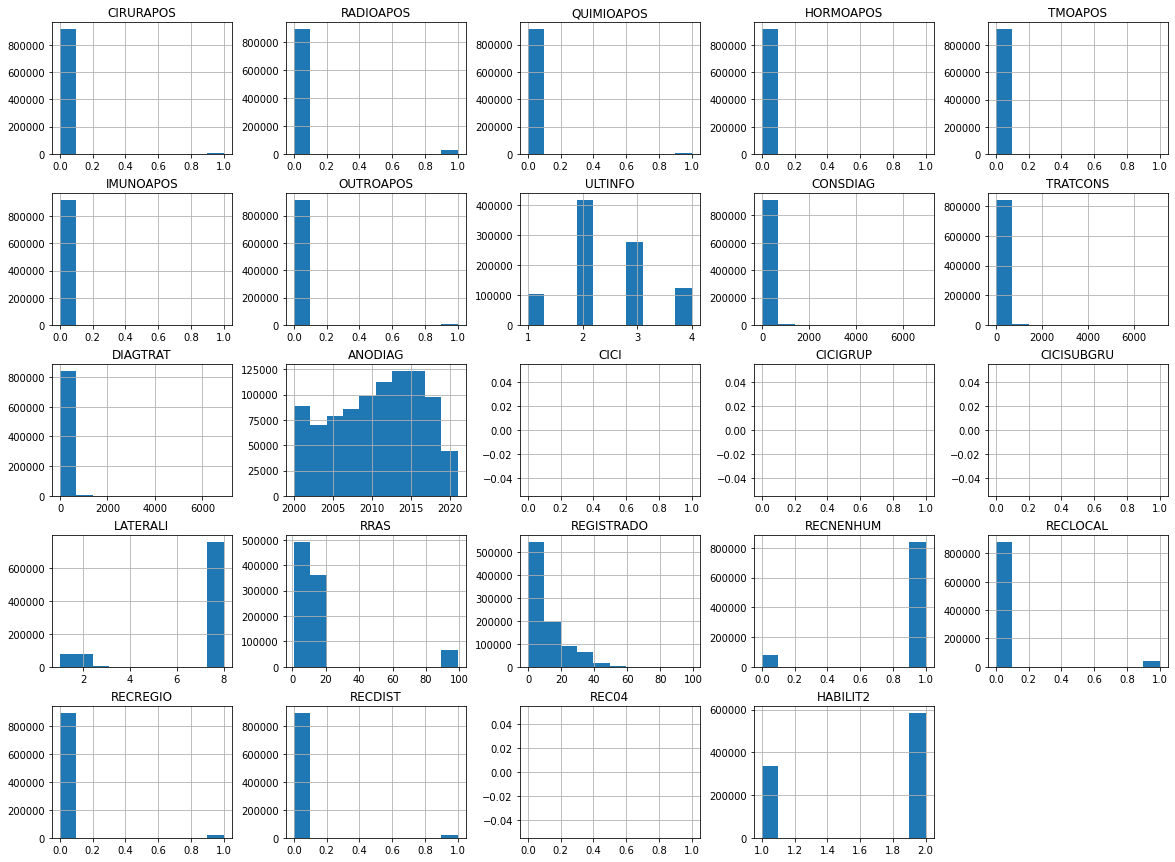

In [ ]:
data.iloc[:,60:].hist(bins=10,figsize=(20,15))
plt.show()

## **Missing values**

Now let's see the amount of missing values per column, we have 17 columns with more than 50% of missing data, being 6 with all missing values, if we want to use any of these for the machine learning models, it will be necessary to treat the missing values, placing 0 or some string that indicates that the value is missing, for example. 

Another option is not using the columns in the analysis, we will see later in this project the proposed solutions to solve this problem.

In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
prop = missing[missing > 0]/data.shape[0]
prop

CICISUBGRU    1.000000
META04        1.000000
REC04         1.000000
CICI          1.000000
META03        1.000000
CICIGRUP      1.000000
OUTRACLA      0.999519
INSTORIG      0.999492
REC03         0.993936
REC02         0.981016
META02        0.958588
REC01         0.934876
DTRECIDIVA    0.895559
META01        0.866487
PM            0.573744
PN            0.556869
PT            0.554683
TRATCONS      0.079993
DIAGTRAT      0.079993
DTTRAT        0.079993
DRS           0.072065
REGISTRADO    0.001678
DTULTINFO     0.000052
DESCMORFO     0.000004
ULTINFO       0.000003
dtype: float64

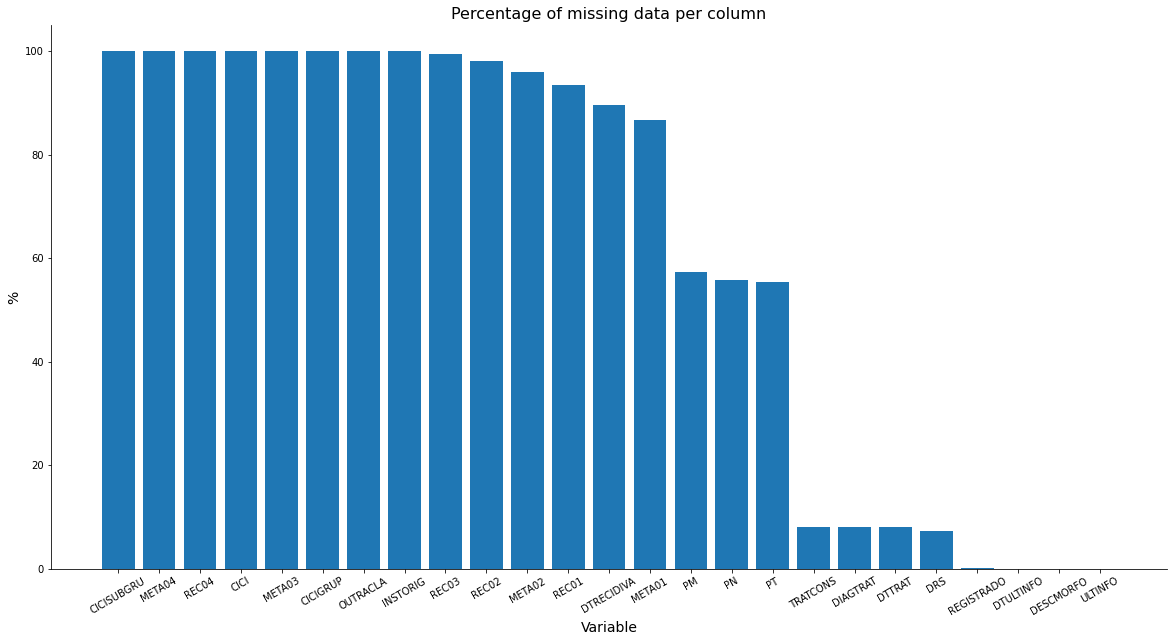

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(height = prop*100, x=prop.index)
plt.xlabel('Variable', size=14)
plt.ylabel('%', size=14)
plt.title('Percentage of missing data per column', size=16)
plt.xticks(rotation=30)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

## **Columns analysis**

In this section, the columns will be analyzed individually, with the aim of examining each one of them and obtaining a function that will be used in the data before starting the study with the machine learning models.

The columns were divided according to the type of each one, resulting in the categories: dates, numeric categories, letters categories, numbers, strings, letters and numbers categories.

Columns with unique values will be dropped from the dataset in the function called `variables_preprocessing`. Another treatment that will be done in the columns is the filling of string columns with missing values with ** Sem informação **, being the columns:

* `META01`;

* `META02`;

* `REC01`;

* `REC02`;

* `REC03`;

* `PT`;

* `PN`;

* `PM`.

The `DRS` column will have the missing values filled with 0, after using the split method to obtain only the numbers in this column.

We also excluded from the data `ECGRUP` with X and Y values and C44 topographies (with morphologies between 80101 and 81103).

Finally, the columns that were dropped from the dataset, because they have unique values, only NaN values or because they are descriptions of the disease, are the following:

* `S`;

* `QUIMIOANT`;

* `HORMOANT`;

* `TMOANT`;

* `IMUNOANT`;

* `OUTROANT`;

* `UFNASC`;

* `CIDADE`;

* `DESCTOPO`;

* `DESCMORFO`;

* `CICISUBGRU`;

* `CICIGRUP`;

* `CICI`;

* `META03`;

* `META04`;

* `REC04`;

* `INSTORIG`;

* `OUTRACLA`.

> Check the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

In [ ]:
df_aux = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/BD_Lucas.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (33,34,78,83,88,89,90) have mixed types.Specify dtype option on import or set low_memory=False.



(922473, 93)


### **Dates**

In [ ]:
# Data - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA', 'DTPREENCH']
df_aux[dates].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT         73791
DTULTINFO         48
DTRECIDIVA    826129
DTPREENCH          0
dtype: int64

In [ ]:
(df_aux[dates].isna().sum()/df_aux.shape[0])*100

DTCONSULT      0.000000
DTDIAG         0.000000
DTTRAT         7.999259
DTULTINFO      0.005203
DTRECIDIVA    89.555900
DTPREENCH      0.000000
dtype: float64

### **Numerical categories**

In [ ]:
df_aux.SEXO.value_counts()

2    462337
1    460136
Name: SEXO, dtype: int64

In [ ]:
df_aux.ESCOLARI.value_counts()

2    304677
9    240355
3    141699
4    108260
1     71213
5     56269
Name: ESCOLARI, dtype: int64

In [ ]:
df_aux.CATEATEND.value_counts()

2    462075
9    378197
1     77563
3      4638
Name: CATEATEND, dtype: int64

In [ ]:
np.sort(df_aux.CLINICA.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 99])

In [ ]:
df_aux.DIAGPREV.value_counts()

1    571484
2    350989
Name: DIAGPREV, dtype: int64

In [ ]:
df_aux.BASEDIAG.value_counts()

3    907229
2     12653
1      1822
9       769
Name: BASEDIAG, dtype: int64

In [ ]:
df_aux.S.value_counts() ### drop

8    922473
Name: S, dtype: int64

In [ ]:
df_aux.G.value_counts()

8    883771
9     11963
3     10224
2      8453
1      4451
4      3611
Name: G, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.G[df_aux.G < 8].count()

26739

In [ ]:
df_aux.LOCALTNM.value_counts()

8    917508
2      2175
9      1439
1       696
3       655
Name: LOCALTNM, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.LOCALTNM[df_aux.LOCALTNM < 8].count()

3526

In [ ]:
df_aux.IDMITOTIC.value_counts()

8    921935
2       286
1       167
9        85
Name: IDMITOTIC, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.IDMITOTIC[df_aux.IDMITOTIC < 8].count()

453

In [ ]:
df_aux.PSA.value_counts()

8    889208
1     18490
2      6330
3      5830
9      2615
Name: PSA, dtype: int64

In [ ]:
# 8 - Not applicable, 9 - X
df_aux.PSA[df_aux.PSA < 8].count()

30650

In [ ]:
df_aux.GLEASON.value_counts()

8    889208
2     14056
1     10219
3      6593
9      2397
Name: GLEASON, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.GLEASON[df_aux.GLEASON < 8].count()

30868

In [ ]:
df_aux.NAOTRAT.value_counts()

8    848457
5     30440
7     19240
2      9566
9      7209
6      2412
3      1934
4      1709
1      1506
Name: NAOTRAT, dtype: int64

In [ ]:
df_aux.NENHUM.unique()

array([0, 1])

In [ ]:
df_aux.CIRURGIA.unique()

array([0, 1])

In [ ]:
df_aux.RADIO.unique()

array([1, 0])

In [ ]:
df_aux.QUIMIO.unique()

array([1, 0])

In [ ]:
df_aux.HORMONIO.unique()

array([0, 1])

In [ ]:
df_aux.TMO.unique()

array([0, 1])

In [ ]:
df_aux.IMUNO.unique()

array([0, 1])

In [ ]:
df_aux.OUTROS.unique()

array([0, 1])

In [ ]:
df_aux.NENHUMANT.unique()

array([1, 0])

In [ ]:
df_aux.CIRURANT.unique()

array([0, 1])

In [ ]:
df_aux.RADIOANT.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOANT.unique() ### drop

array([0])

In [ ]:
df_aux.HORMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.TMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.IMUNOANT.unique() ### drop

array([0])

In [ ]:
df_aux.OUTROANT.unique() ### drop

array([0])

In [ ]:
df_aux.NENHUMAPOS.unique()

array([1, 0])

In [ ]:
df_aux.CIRURAPOS.unique()

array([0, 1])

In [ ]:
df_aux.RADIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.HORMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.TMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.IMUNOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.OUTROAPOS.unique()

array([0, 1])

In [ ]:
df_aux.ULTINFO.value_counts()

2.0    419178
3.0    275748
4.0    123337
1.0    104207
Name: ULTINFO, dtype: int64

In [ ]:
df_aux.LATERALI.value_counts()

8    761873
1     81052
2     77163
3      2385
Name: LATERALI, dtype: int64

In [ ]:
df_aux.RECNENHUM.value_counts()

1    842219
0     80254
Name: RECNENHUM, dtype: int64

In [ ]:
df_aux.RECLOCAL.value_counts()

0    883419
1     39054
Name: RECLOCAL, dtype: int64

In [ ]:
df_aux.RECREGIO.value_counts()

0    899934
1     22539
Name: RECREGIO, dtype: int64

In [ ]:
df_aux.RECDIST.value_counts()

0    898935
1     23538
Name: RECDIST, dtype: int64

In [ ]:
df_aux.HABILIT2.unique()

array([1, 2])

### **Letter categories**

In [ ]:
df_aux.TRATAMENTO.unique()

array(['F', 'E', 'A', 'I', 'J', 'B', 'G', 'C', 'H', 'D'], dtype=object)

In [ ]:
df_aux.TRATHOSP.unique()

array(['F', 'E', 'A', 'I', 'J', 'B', 'G', 'C', 'H', 'D'], dtype=object)

In [ ]:
df_aux.TRATFANTES.unique()

array(['J', 'A', 'B'], dtype=object)

In [ ]:
df_aux.TRATFAPOS.unique()

array(['J', 'C', 'I', 'B', 'A', 'F', 'E', 'D', 'G', 'H'], dtype=object)

### **Numbers**

In [ ]:
df_aux.IDADE.nunique()

109

In [ ]:
df_aux.CONSDIAG.isna().sum()

0

In [ ]:
df_aux.TRATCONS.isna().sum()

73791

In [ ]:
df_aux.DIAGTRAT.isna().sum()

73791

In [ ]:
np.sort(df_aux.ANODIAG.unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df_aux.IBGE.nunique()

2891

In [ ]:
df_aux.MORFO.unique()

array([82611, 88231, 92613, 83133, 90153, 90143, 82513, 84013, 81473,
       82503, 84203, 85743, 85733, 85713, 85703, 85723, 82553, 83103,
       83233, 84003, 82153, 81433, 84133, 82633, 82613, 82103, 82213,
       82203, 83833, 83803, 83823, 81413, 81543, 83333, 83313, 83303,
       83323, 85763, 82632, 82612, 82102, 81402, 84803, 84823, 82903,
       84083, 85033, 85032, 82603, 85253, 84813, 84103, 81403, 83843,
       81443, 81903, 82113, 82623, 83131, 83811, 83813, 90151, 90141,
       81401, 83801, 83301, 83601, 89333, 99701, 93103, 86303, 86301,
       99803, 99801, 99833, 99831, 99843, 99841, 99821, 99823, 88943,
       88411, 82481, 94303, 94013, 94121, 94203, 94113, 94213, 94211,
       94103, 94003, 93841, 89733, 89723, 89343, 82443, 82433, 82413,
       82421, 82451, 85603, 82003, 80213, 80983, 81233, 80933, 80923,
       80973, 80903, 80913, 80943, 83003, 82543, 82533, 82523, 85083,
       81243, 82013, 82703, 82723, 83903, 85503, 81503, 82473, 86403,
       81313, 81302,

In [ ]:
np.sort(df_aux.RRAS.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       99])

In [ ]:
df_aux.RRAS.value_counts()

6     231392
12    104966
13    104884
9      79399
99     66478
15     60281
10     39239
14     31175
1      29602
8      29129
17     28303
2      26696
5      21623
7      19613
16     18808
11     14202
4      12149
3       4534
Name: RRAS, dtype: int64

In [ ]:
# Filled OUTRACLA
df_aux.shape[0] - df_aux.OUTRACLA.isna().sum()

444

In [ ]:
df_aux.OUTRACLA.value_counts().head(20)

0.0           215
1.0            66
2.0            57
3.0            40
4.0            15
85233.0         7
84413.0         6
9.0             3
85300.0         3
8.0             2
80973.0         2
82512.0         2
917193.0        1
19012018.0      1
34.0            1
32.0            1
807025.0        1
633.0           1
80001.0         1
44.0            1
Name: OUTRACLA, dtype: int64

In [ ]:
np.sort(df_aux.REGISTRADO.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 55., 56., 59., 60., 61., 99., nan])

### **Strings**

In [ ]:
df_aux.UFNASC.unique()

array(['SP', 'MG', 'BA', 'SI', 'MS', 'AC', 'MA', 'PA', 'SE', 'PE', 'PB',
       'PR', 'CE', 'PI', 'OP', 'RS', 'ES', 'SC', 'RJ', 'RN', 'DF', 'GO',
       'AL', 'RO', 'MT', 'RR', 'AP', 'AM', 'TO'], dtype=object)

In [ ]:
df_aux.UFRESID.unique()

array(['SP', 'AM', 'MS', 'MG', 'AC', 'BA', 'DF', 'GO', 'RO', 'CE', 'PA',
       'RJ', 'PR', 'MT', 'SC', 'MA', 'RS', 'PI', 'AL', 'ES', 'RR', 'AP',
       'PB', 'TO', 'RN', 'SE', 'OP', 'PE'], dtype=object)

In [ ]:
df_aux.CIDADE.value_counts().head(10)

SAO PAULO                231392
SAO JOSE DO RIO PRETO     17727
CAMPINAS                  17115
RIBEIRAO PRETO            16429
GUARULHOS                 13269
JAU                       12179
BOTUCATU                  10225
OSASCO                     9739
BARRETOS                   9540
PIRACICABA                 9537
Name: CIDADE, dtype: int64

In [ ]:
df_aux.FAIXAETAR.unique()

array(['40-49', '00-09', '50-59', '20-29', '10-19', '70+', '60-69',
       '30-39'], dtype=object)

In [ ]:
df_aux.DRS.unique()

array(['DRS 07  CAMPINAS', nan, 'DRS 14  SÃO JOÃO DA BOA VISTA',
       'DRS 01  SÃO PAULO', 'DRS 06  BAURU', 'DRS 16  SOROCABA',
       'DRS 10  PIRACICABA', 'DRS 03  ARARAQUARA',
       'DRS 13  RIBEIRÃO PRETO', 'DRS 11  PRESIDENTE PRUDENTE',
       'DRS 09  MARÍLIA', 'DRS 12  REGISTRO', 'DRS 08  FRANCA',
       'DRS 17  TAUBATÉ', 'DRS 04  SANTOS',
       'DRS 15  SÃO JOSÉ DO RIO PRETO', 'DRS 02  ARAÇATUBA',
       'DRS 05  BARRETOS'], dtype=object)

In [ ]:
df_aux.DRS.isna().sum()

66478

In [ ]:
df_aux.DESCTOPO.value_counts().head(10)

PELE DE OUTRAS PARTES E DE PARTES NAO ESPECIFICADAS DA FACE    99686
PROSTATA                                                       94796
MAMA SOE EXCLUI PELE DA MAMA C445                              49694
COLO DO UTERO                                                  43198
MEDULA OSSEA                                                   33480
MAMA QUADRANTE SUPERIOR EXTERNO DA                             29306
PELE DO OMBRO E MEMBROS SUPERIORES                             27408
RETO SOE                                                       26692
PELE DO TRONCO                                                 22670
PULMAO SOE                                                     20953
Name: DESCTOPO, dtype: int64

In [ ]:
df_aux.DESCMORFO.value_counts().head(10)

CARCINOMA ESCAMOCELULAR SOE            148378
ADENOCARCINOMA SOE                     125625
CARCINOMA BASOCELULAR SOE               94928
CARCINOMA DUCTAL INFILTRANTE SOE        89590
CARCINOMA DE CELULAS ACINOSAS           61737
ADENOCARCINOMA TUBULAR                  27736
CARCINOMA BASOCELULAR NODULAR           25116
CARCINOMA SOE                           23192
CARCINOMA ESCAMOCELULAR IN SITU SOE     16787
MELANOMA MALIGNO SOE                     9738
Name: DESCMORFO, dtype: int64

In [ ]:
df_aux.CICISUBGRU.unique()

array([nan])

In [ ]:
df_aux.INSTORIG.nunique()

191

### **Numbers and letters categories** 

In [ ]:
df_aux.TOPO.nunique()

331

In [ ]:
df_aux.TOPOGRUP.unique()

array(['C17', 'C41', 'C18', 'C49', 'C20', 'C61', 'C76', 'C44', 'C40',
       'C19', 'C53', 'C64', 'C56', 'C23', 'C71', 'C16', 'C22', 'C54',
       'C50', 'C38', 'C21', 'C34', 'C15', 'C80', 'C73', 'C25', 'C11',
       'C24', 'C51', 'C07', 'C75', 'C69', 'C31', 'C08', 'C05', 'C30',
       'C06', 'C02', 'C09', 'C04', 'C00', 'C10', 'C55', 'C14', 'C77',
       'C13', 'C48', 'C26', 'C72', 'C32', 'C67', 'C52', 'C33', 'C74',
       'C57', 'C68', 'C01', 'C65', 'C42', 'C39', 'C63', 'C62', 'C60',
       'C12', 'C03', 'C47', 'C37', 'C58', 'C70', 'C66'], dtype=object)

In [ ]:
print(df_aux.META01.isna().sum())
print(df_aux.META02.isna().sum())
print(df_aux.META03.isna().sum())
print(df_aux.META04.isna().sum())

799311
884272
922473
922473


In [ ]:
print(df_aux.REC01.isna().sum())
print(df_aux.REC02.isna().sum())
print(df_aux.REC03.isna().sum())
print(df_aux.REC04.isna().sum())

862398
904961
916879
922473


In [ ]:
np.sort(df_aux.EC.unique())

array(['0', '0A', '0IS', 'I', 'IA', 'IA1', 'IA2', 'IB', 'IB1', 'IB2',
       'IC', 'II', 'IIA', 'IIA1', 'IIA2', 'IIB', 'IIC', 'III', 'IIIA',
       'IIIB', 'IIIC', 'IS', 'IV', 'IVA', 'IVB', 'IVC', 'X', 'Y'],
      dtype=object)

In [ ]:
np.sort(df_aux.ECGRUP.unique())

array(['0', 'I', 'II', 'III', 'IV', 'X', 'Y'], dtype=object)

In [ ]:
df_aux.ECGRUP.value_counts()

I      261946
II     171679
IV     153941
III    129619
Y      118139
0       48519
X       38630
Name: ECGRUP, dtype: int64

In [ ]:
np.sort(df_aux['T'].unique())

array(['0', '1', '1A', '1B', '1C', '1M', '2', '2A', '2B', '2C', '3', '3A',
       '3B', '3C', '4', '4A', '4B', '4C', '4D', '4E', 'A', 'CD', 'CL',
       'IS', 'PA', 'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux['N'].unique())

array(['0', '1', '2', '3', 'C', 'P', 'X', 'Y'], dtype=object)

In [ ]:
np.sort(df_aux['M'].unique())

array(['0', '1', 'X', 'Y'], dtype=object)

In [ ]:
df_aux['PT'].unique()

array([nan, 'Y', 'X', '1', '2', '1C', '1A', '1B', '0', '3', '2A', '4',
       '1A1', '4B', '3C', '4D', '4A', '2B', '3B', '3A', '1B2', '1B1',
       'IS', '2C', '1A2', '4C', '1MI', 'CDI', 'T3', 'IC', '< .', '3a',
       'T2', '2b', 'A', 'T1A', 'T1C', '4b', 'AD', 'T1B', 'CLI', 'PAG',
       'y', '4E', 'T4B', 'T3B', 'PIS'], dtype=object)

In [ ]:
df_aux[df_aux['PT'] == '< .'].shape

(20, 93)

In [ ]:
df_aux.PN.unique()

array([nan, 'Y', 'X', '0', '1', '2', '3', 'N', '<', 'O', 'P', 'I'],
      dtype=object)

In [ ]:
df_aux[df_aux['PN'] == '<'].shape

(20, 93)

In [ ]:
df_aux.PM.unique()

array([nan, 'Y', 'X', '0', '1', 'M', '<'], dtype=object)

In [ ]:
df_aux[df_aux['PM'] == '<'].shape

(20, 93)

In [ ]:
df_aux.CICI.unique()

array([nan])

In [ ]:
df_aux.CICIGRUP.unique()

array([nan])

### **First preprocessing**

Here the `variables_preprocessing` function will be applied, obtaining a new dataset with 75 columns (the raw data has 93 columns). It appears that we still have columns with missing values (`DTRECIDIVA`, `TRATCONS`, `DTTRAT`, `DIAGTRAT`, `REGISTRADO` and `ULTINFO`), all will be dealt with later. 

After the function, the new dataset will be saved as a csv file, to be used in the sequence.

In [ ]:
df = variables_preprocessing(df_aux)
df.head()

,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2
3,1,26,2,SP,3529401,9,2003-02-04,4,1,2003-05-29,3,C491,C49,88231,IIA,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1,8,8,8,8,**Sem informação**,**Sem informação**,2003-05-29 00:00:00,8,I,I,J,J,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-02-12 00:00:00,2.0,114,114.0,0.0,2003,20-29,8,01,1,2003-12-01,1.0,2011-02-03 00:00:00,0,1,0,0,C49,**Sem informação**,**Sem informação**,2
29,1,50,9,SP,3531209,2,2016-01-15,26,2,2015-12-08,3,C402,C40,92613,IA,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2016-02-29 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-07-31 00:00:00,2.0,38,45.0,83.0,2015,50-59,8,07,15,2017-06-09,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2
30,1,23,9,SP,3542602,9,2001-07-10,26,1,2001-10-29,3,C402,C40,92613,IIB,II,2,0,0,2,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2001-10-29 00:00:00,8,I,I,J,J,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2007-02-22 00:00:00,3.0,111,111.0,0.0,2001,20-29,8,12,7,2002-05-24,2.0,2004-06-22 00:00:00,0,0,1,0,C34,**Sem informação**,**Sem informação**,1
31,2,14,9,SP,3518800,9,2006-08-15,26,1,2006-10-20,3,C402,C40,92613,IB,I,2,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2006-10-20 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2010-11-27 00:00:00,2.0,66,66.0,0.0,2006,10-19,8,01,2,2007-05-07,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1
33,1,26,4,AC,1200401,2,2018-08-23,24,2,2018-07-13,3,C402,C40,92613,IVA,IV,X,X,1,**Sem informação**,**Sem informação**,**Sem informação**,8,8,8,8,8,C34,**Sem informação**,2018-11-06 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2020-06-22 00:00:00,1.0,41,75.0,116.0,2018,20-29,8,0,99,2020-06-29,15.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2


In [ ]:
df.shape

(581753, 75)

In [ ]:
df.isna().sum().sort_values(ascending=False).head(8)

DTRECIDIVA    502783
DTTRAT         42795
TRATCONS       42795
DIAGTRAT       42795
DTULTINFO         30
ULTINFO            2
LOCALTNM           0
M                  0
dtype: int64

In [ ]:
df.NAOTRAT.value_counts()

8    538811
5     18809
7      9862
2      7343
9      2615
6      1233
3      1123
4      1028
1       929
Name: NAOTRAT, dtype: int64

In [ ]:
save_csv(df, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing_dates.csv')

CSV file saved successfully!


# **Creating new columns**

In this section, new columns will be created based on the difference between the date columns, the last information column and the recurrence column.

In addition, from here we will have two datasets, one with `UFRESID` for the São Paulo state and another one for the other states.

In [ ]:
df = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing_dates.csv')
df.head()

(581753, 75)


,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2
0,1,26,2,SP,3529401,9,2003-02-04,4,1,2003-05-29,3,C491,C49,88231,IIA,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1,8,8,8,8,**Sem informação**,**Sem informação**,2003-05-29 00:00:00,8,I,I,J,J,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-02-12 00:00:00,2.0,114,114.0,0.0,2003,20-29,8,1,1,2003-12-01,1.0,2011-02-03 00:00:00,0,1,0,0,C49,**Sem informação**,**Sem informação**,2
1,1,50,9,SP,3531209,2,2016-01-15,26,2,2015-12-08,3,C402,C40,92613,IA,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2016-02-29 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-07-31 00:00:00,2.0,38,45.0,83.0,2015,50-59,8,7,15,2017-06-09,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2
2,1,23,9,SP,3542602,9,2001-07-10,26,1,2001-10-29,3,C402,C40,92613,IIB,II,2,0,0,2,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2001-10-29 00:00:00,8,I,I,J,J,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2007-02-22 00:00:00,3.0,111,111.0,0.0,2001,20-29,8,12,7,2002-05-24,2.0,2004-06-22 00:00:00,0,0,1,0,C34,**Sem informação**,**Sem informação**,1
3,2,14,9,SP,3518800,9,2006-08-15,26,1,2006-10-20,3,C402,C40,92613,IB,I,2,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2006-10-20 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2010-11-27 00:00:00,2.0,66,66.0,0.0,2006,10-19,8,1,2,2007-05-07,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1
4,1,26,4,AC,1200401,2,2018-08-23,24,2,2018-07-13,3,C402,C40,92613,IVA,IV,X,X,1,**Sem informação**,**Sem informação**,**Sem informação**,8,8,8,8,8,C34,**Sem informação**,2018-11-06 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2020-06-22 00:00:00,1.0,41,75.0,116.0,2018,20-29,8,0,99,2020-06-29,15.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2


In [ ]:
# Dates - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
lista_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA', 'DTPREENCH']
df[lista_datas].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT         42795
DTULTINFO         30
DTRECIDIVA    502783
DTPREENCH          0
dtype: int64

## **Date difference columns**

The differences between the dates of consultation, diagnosis and treatment will be calculated, and then the difference between the date of recurrence and last information and the first three.

This process will be performed by the function `get_dates_diff`, which drops the empty rows of the `DTTRAT` column, converts the date columns to the datetime format and then calculates the difference between the dates in days. 

The idea is presented below.


> See the full function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General).

**Date columns**

* Consultation - $t_1$

* Diagnosis - $t_2$

* Treatment - $t_3$

* Recurrence - $t_4$

* Last information - $t_5$

---

**Difference, in days, between dates:**

$$CONSDIAG = t_2 - t_1$$

$$DIAGTRAT = t_3 - t_2$$

$$TRATCONS = t_3 - t_1$$

**Recurrence:**

$$RECCONS = t_4 - t_1$$

$$RECDIAG = t_4 - t_2$$

$$RECTRAT = t_4 - t_3$$

**Last information:**

$$ULTICONS = t_5 - t_1$$

$$ULTIDIAG = t_5 - t_2$$

$$ULTITRAT = t_5 - t_3$$

In [ ]:
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA', 'CONSDIAG',
         'DIAGTRAT', 'TRATCONS', 'RECCONS', 'RECDIAG', 'RECTRAT', 'ULTICONS',
         'ULTIDIAG', 'ULTITRAT']

**SP - Dataset for São Paulo state**

In [ ]:
df_SP = df[df.UFRESID == 'SP'].reset_index().copy() # Dataset for SP 
df_SP.drop(columns=['index'], inplace=True)
print(df_SP.shape)
df_SP.head(3)

(544881, 75)


,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2
0,1,26,2,SP,3529401,9,2003-02-04,4,1,2003-05-29,3,C491,C49,88231,IIA,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1,8,8,8,8,**Sem informação**,**Sem informação**,2003-05-29 00:00:00,8,I,I,J,J,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-02-12 00:00:00,2.0,114,114.0,0.0,2003,20-29,8,1,1,2003-12-01,1.0,2011-02-03 00:00:00,0,1,0,0,C49,**Sem informação**,**Sem informação**,2
1,1,50,9,SP,3531209,2,2016-01-15,26,2,2015-12-08,3,C402,C40,92613,IA,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2016-02-29 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-07-31 00:00:00,2.0,38,45.0,83.0,2015,50-59,8,7,15,2017-06-09,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2
2,1,23,9,SP,3542602,9,2001-07-10,26,1,2001-10-29,3,C402,C40,92613,IIB,II,2,0,0,2,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2001-10-29 00:00:00,8,I,I,J,J,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,2007-02-22 00:00:00,3.0,111,111.0,0.0,2001,20-29,8,12,7,2002-05-24,2.0,2004-06-22 00:00:00,0,0,1,0,C34,**Sem informação**,**Sem informação**,1


New columns with the dates difference

In [ ]:
df_SP = get_dates_diff(df_SP, lista_datas)
print(df_SP.shape)
df_SP[dates].head(3)

(506037, 81)


,DTCONSULT,DTDIAG,DTTRAT,DTULTINFO,DTRECIDIVA,CONSDIAG,DIAGTRAT,TRATCONS,RECCONS,RECDIAG,RECTRAT,ULTICONS,ULTIDIAG,ULTITRAT
0,2003-02-04,2003-05-29,2003-05-29,2019-02-12,2011-02-03,114,0,114,2921.0,2807.0,2807.0,5852,5738,5738
1,2016-01-15,2015-12-08,2016-02-29,2019-07-31,NaT,-38,83,45,NaN,NaN,NaN,1293,1331,1248
2,2001-07-10,2001-10-29,2001-10-29,2007-02-22,2004-06-22,111,0,111,1078.0,967.0,967.0,2053,1942,1942


In [ ]:
df_SP.NAOTRAT.value_counts()

8    505887
7       148
9         1
2         1
Name: NAOTRAT, dtype: int64

In [ ]:
df_SP[lista_datas].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT             0
DTULTINFO          0
DTRECIDIVA    431715
DTPREENCH          0
dtype: int64

**Other states dataset**

In [ ]:
df_fora = df[df.UFRESID != 'SP'].reset_index().copy() # Dataset for Other States
df_fora.drop(columns=['index'], inplace=True)
print(df_fora.shape)
df_fora.head(3)

(36872, 75)


,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2
0,1,26,4,AC,1200401,2,2018-08-23,24,2,2018-07-13,3,C402,C40,92613,IVA,IV,X,X,1,**Sem informação**,**Sem informação**,**Sem informação**,8,8,8,8,8,C34,**Sem informação**,2018-11-06 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2020-06-22 00:00:00,1.0,41,75.0,116.0,2018,20-29,8,0,99,2020-06-29,15.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2
1,1,49,3,BA,2930709,2,2003-08-22,26,1,2003-12-08,3,C402,C40,92613,IIB,II,2,0,0,**Sem informação**,**Sem informação**,**Sem informação**,3,8,8,8,8,**Sem informação**,**Sem informação**,2004-05-18 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2012-04-19 00:00:00,2.0,108,270.0,162.0,2003,40-49,8,0,99,2012-03-09,7.0,2008-07-15 00:00:00,0,0,1,0,C77,**Sem informação**,**Sem informação**,2
2,1,59,9,MG,3102605,9,2010-04-05,32,1,2010-04-05,3,C619,C61,83133,II,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,8,8,8,8,8,**Sem informação**,**Sem informação**,2010-10-19 00:00:00,8,A,A,J,J,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2015-08-24 00:00:00,2.0,0,197.0,197.0,2010,50-59,8,0,99,2011-06-14,4.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2


New columns with the dates difference

In [ ]:
df_fora = get_dates_diff(df_fora, lista_datas)
print(df_fora.shape)
df_fora[dates].head(3)

(32891, 81)


,DTCONSULT,DTDIAG,DTTRAT,DTULTINFO,DTRECIDIVA,CONSDIAG,DIAGTRAT,TRATCONS,RECCONS,RECDIAG,RECTRAT,ULTICONS,ULTIDIAG,ULTITRAT
0,2018-08-23,2018-07-13,2018-11-06,2020-06-22,NaT,-41,116,75,NaN,NaN,NaN,669,710,594
1,2003-08-22,2003-12-08,2004-05-18,2012-04-19,2008-07-15,108,162,270,1789.0,1681.0,1519.0,3163,3055,2893
2,2010-04-05,2010-04-05,2010-10-19,2015-08-24,NaT,0,197,197,NaN,NaN,NaN,1967,1967,1770


In [ ]:
df_fora.NAOTRAT.value_counts()

8    32890
7        1
Name: NAOTRAT, dtype: int64

In [ ]:
df_fora[lista_datas].isna().sum()

DTCONSULT         0
DTDIAG            0
DTTRAT            0
DTULTINFO         0
DTRECIDIVA    29244
DTPREENCH         0
dtype: int64

## **Creation of death label**

In this section, labels will be created based on the latest information, one column only if the person died or not (`obito_geral`) and one for death by cancer (`obito_cancer`)
Another three columns will have the information about how many years after the diagnosis the person lived (`vivo_ano1`, `vivo_ano3`, `vivo_ano5`). 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states.

> This process will be performed by the `get_labels` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Death labels**

* Death at any time - obito_geral;

* Death by cancer - obito_cancer;

* Patient is alive after one year - vivo_ano1;

* Patient is alive after three years - vivo_ano3;

* Patient is alive after five years - vivo_ano5.
---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


**SP**

In [ ]:
df_SP.head(2)

,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,...,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2,RECCONS,RECDIAG,RECTRAT,ULTICONS,ULTIDIAG,ULTITRAT
0,1,26,2,SP,3529401,9,2003-02-04,4,1,2003-05-29,3,C491,C49,88231,IIA,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1,8,8,8,8,**Sem informação**,**Sem informação**,2003-05-29,8,I,I,J,J,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-02-12,2.0,114,114,0,2003,20-29,8,1,1,2003-12-01,1.0,2011-02-03,0,1,0,0,C49,**Sem informação**,**Sem informação**,2,2921.0,2807.0,2807.0,5852,5738,5738
1,1,50,9,SP,3531209,2,2016-01-15,26,2,2015-12-08,3,C402,C40,92613,IA,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2016-02-29,8,A,A,J,J,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,2019-07-31,2.0,-38,45,83,2015,50-59,8,7,15,2017-06-09,3.0,NaT,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2,NaN,NaN,NaN,1293,1331,1248


In [ ]:
df_SP.ULTINFO.value_counts()

2.0    216562
3.0    169116
1.0     60385
4.0     59974
Name: ULTINFO, dtype: int64

In [ ]:
df_SP = get_labels(df_SP)

In [ ]:
columns = ['ULTINFO', 'obito_geral', 'obito_cancer', 'vivo_ano1', 'vivo_ano3', 'vivo_ano5']

df_SP[columns].head()

,ULTINFO,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,2.0,0,0,1,1,1
1,2.0,0,0,1,1,0
2,3.0,1,1,1,1,1
3,2.0,0,0,1,1,0
4,3.0,1,1,1,1,0


In [ ]:
df_SP[columns][df_SP.obito_geral == 0].head(10)

,ULTINFO,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,2.0,0,0,1,1,1
1,2.0,0,0,1,1,0
3,2.0,0,0,1,1,0
5,2.0,0,0,1,0,0
6,1.0,0,0,1,1,0
10,2.0,0,0,0,0,0
11,2.0,0,0,1,0,0
12,2.0,0,0,1,0,0
13,1.0,0,0,1,0,0
14,2.0,0,0,1,1,0


In [ ]:
save_csv(df_SP, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

CSV file saved successfully!


**Other states**

In [ ]:
df_fora.ULTINFO.value_counts()

2.0    17069
3.0    10089
1.0     3290
4.0     2443
Name: ULTINFO, dtype: int64

In [ ]:
df_fora = get_labels(df_fora)

In [ ]:
columns = ['obito_geral', 'obito_cancer', 'vivo_ano1', 'vivo_ano3', 'vivo_ano5']

df_fora[columns].head()

,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,0,0,1,0,0
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,0,0
4,1,1,0,0,0


In [ ]:
df_fora[columns][df_fora.obito_geral == 0].head(10)

,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,0,0,1,0,0
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,0,0
5,0,0,1,0,0
7,0,0,1,0,0
9,0,0,1,0,0
10,0,0,1,1,1
11,0,0,1,0,0
12,0,0,1,1,1


In [ ]:
save_csv(df_fora, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

CSV file saved successfully!


## **Creation of recurrence labels**

In this section, labels will be created based on the recurrence, two columns for people who died, one without recurrence and one with recurrence, and two for people who are alive, also one without recurrence and one with recurrence. 

After creating the columns, the datasets will be saved in csv files, one for São Paulo and one for the other states, now both datasets have 94 columns. 

> This process will be performed by the `get_labels_rec` function, see the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#General) to see the complete function.

**Recurrence labels**

* Death without recurrence - ob_sem_rec;

* Death with recurrence - ob_com_rec;

* Alive without recurrence - vivo_sem_rec;

* Alive with recurrence - vivo_com_rec.

---

**Last information**

1 - Alive with cancer

2 - Alive, without other specifications

3 - Death by cancer

4 - Death by other causes


In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(506037, 86)
(32891, 86)


**SP**

In [ ]:
df_SP.head(2)

,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,...,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2,RECCONS,RECDIAG,RECTRAT,ULTICONS,ULTIDIAG,ULTITRAT,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,1,26,2,SP,3529401,9,2003-02-04,4,1,2003-05-29,3,C491,C49,88231,IIA,II,2B,0,0,**Sem informação**,**Sem informação**,**Sem informação**,1,8,8,8,8,**Sem informação**,**Sem informação**,2003-05-29,8,I,I,J,J,0,1,1,0,1,...,1,0,0,0,0,0,0,0,2019-02-12,2.0,114,114,0,2003,20-29,8,1,1,2003-12-01,1.0,2011-02-03,0,1,0,0,C49,**Sem informação**,**Sem informação**,2,2921.0,2807.0,2807.0,5852,5738,5738,0,0,1,1,1
1,1,50,9,SP,3531209,2,2016-01-15,26,2,2015-12-08,3,C402,C40,92613,IA,I,1,0,0,1,0,0,8,8,8,8,8,**Sem informação**,**Sem informação**,2016-02-29,8,A,A,J,J,0,1,0,0,0,...,1,0,0,0,0,0,0,0,2019-07-31,2.0,-38,45,83,2015,50-59,8,7,15,2017-06-09,3.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2,NaN,NaN,NaN,1293,1331,1248,0,0,1,1,0


In [ ]:
df_SP = get_label_rec(df_SP)

In [ ]:
columns = ['RECNENHUM', 'obito_geral', 'obito_cancer', 'ob_com_rec', 'ob_sem_rec',
           'vivo_com_rec', 'vivo_sem_rec']
df_SP[columns].head()

,RECNENHUM,obito_geral,obito_cancer,ob_com_rec,ob_sem_rec,vivo_com_rec,vivo_sem_rec
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,0,1,1,1,0,0,0
3,1,0,0,0,0,0,1
4,0,1,1,1,0,0,0


In [ ]:
save_csv(df_SP, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')

CSV file saved successfully!


**Other states**

In [ ]:
df_fora.head(2)

,SEXO,IDADE,ESCOLARI,UFRESID,IBGE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,DTTRAT,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,...,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,FAIXAETAR,LATERALI,DRS,RRAS,DTPREENCH,REGISTRADO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,HABILIT2,RECCONS,RECDIAG,RECTRAT,ULTICONS,ULTIDIAG,ULTITRAT,obito_geral,obito_cancer,vivo_ano1,vivo_ano3,vivo_ano5
0,1,26,4,AC,1200401,2,2018-08-23,24,2,2018-07-13,3,C402,C40,92613,IVA,IV,X,X,1,**Sem informação**,**Sem informação**,**Sem informação**,8,8,8,8,8,C34,**Sem informação**,2018-11-06,8,A,A,J,J,0,1,0,0,0,...,1,0,0,0,0,0,0,0,2020-06-22,1.0,-41,75,116,2018,20-29,8,0,99,2020-06-29,15.0,NaN,1,0,0,0,**Sem informação**,**Sem informação**,**Sem informação**,2,NaN,NaN,NaN,669,710,594,0,0,1,0,0
1,1,49,3,BA,2930709,2,2003-08-22,26,1,2003-12-08,3,C402,C40,92613,IIB,II,2,0,0,**Sem informação**,**Sem informação**,**Sem informação**,3,8,8,8,8,**Sem informação**,**Sem informação**,2004-05-18,8,A,A,J,J,0,1,0,0,0,...,1,0,0,0,0,0,0,0,2012-04-19,2.0,108,270,162,2003,40-49,8,0,99,2012-03-09,7.0,2008-07-15,0,0,1,0,C77,**Sem informação**,**Sem informação**,2,1789.0,1681.0,1519.0,3163,3055,2893,0,0,1,1,1


In [ ]:
df_fora = get_label_rec(df_fora)

In [ ]:
columns = ['RECNENHUM', 'obito_geral', 'obito_cancer', 'ob_com_rec', 'ob_sem_rec',
           'vivo_com_rec', 'vivo_sem_rec']
df_fora[columns].head()

,RECNENHUM,obito_geral,obito_cancer,ob_com_rec,ob_sem_rec,vivo_com_rec,vivo_sem_rec
0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,1,1,0,1,0,0


In [ ]:
save_csv(df_fora, '/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

CSV file saved successfully!
